In [2]:
import numpy as np
import os
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, activations
from tensorflow.keras import backend as K

In [3]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true)))

In [4]:
def load_model():
    model = Sequential()
    # model.add(layers.Conv3D(1, 3, padding='same', input_shape=(7, 30, 24, 1)))
    model.add(layers.ConvLSTM2D(filters=128, kernel_size=(3, 3), input_shape=(7, 30, 24, 1), padding='same', return_sequences=True))
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=True))
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.ConvLSTM2D(filters=32, kernel_size=(3, 3), padding='same', return_sequences=True))
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.ConvLSTM2D(filters=16, kernel_size=(3, 3), padding='same', return_sequences=True))
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.ConvLSTM2D(filters=8, kernel_size=(3, 3) ,padding='same', return_sequences=True))
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.ConvLSTM2D(filters=1, kernel_size=(3, 3) ,padding='same', return_sequences=False))
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(filters=4, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.Conv2D(filters=1, kernel_size=(1,1), padding='same', activation='relu'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    # model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
    model.compile(optimizer=optimizer, loss=root_mean_squared_error, metrics=['accuracy'])
    print(model.summary())
    return model

In [5]:
#plot the train history
def train_history(model_history,train_acc,test_acc,title,ylabel):
    plt.clf()
    plt.plot(model_history.history[train_acc])
    plt.plot(model_history.history[test_acc])
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
def confusion_matrix(predicts,test_labels):
    prediction = np.argmax(predicts, axis = -1)
    actual = np.argmax(test_labels, axis = -1)
    cfs_matrix = pd.crosstab(actual, prediction, rownames = ['label'], colnames = ['predict'])
    return cfs_matrix

In [6]:
#display earthquake image
# x = np.transpose(x, axes=[0, 2, 3, 1])
def show_pic(data, i, min=None, max=None):
    fig = plt.figure(figsize = (15,10))
    img1 = data[i,:,:,0]
    plt.subplot(231)
    plt.imshow(img1, cmap="jet", vmin=min, vmax=max)
    plt.title('obs')
    plt.colorbar(fraction=0.06)
    img2 = data[i,:,:,1]
    plt.subplot(232)
    plt.imshow(img2, cmap="jet", vmin=min, vmax=max)
    plt.title('q2')
    plt.colorbar(fraction=0.06)
    img3 = data[i,:,:,2]
    plt.subplot(233)
    plt.imshow(img3, cmap="jet", vmin=min, vmax=max)
    plt.title('ub')
    plt.colorbar(fraction=0.06)
    img4 = data[i,:,:,3]
    plt.subplot(234)
    plt.imshow(img4, cmap="jet", vmin=min, vmax=max)
    plt.title('lb')
    plt.colorbar(fraction=0.06)
    img5 = data[i,:,:,4]
    plt.subplot(235)
    plt.imshow(img5, cmap="jet", vmin=min, vmax=max)
    plt.title('pos')
    plt.colorbar(fraction=0.06)
    img6 = data[i,:,:,5]
    plt.subplot(236)
    plt.imshow(img6, cmap="jet", vmin=min, vmax=max)
    plt.title('neg')
    plt.colorbar(fraction=0.06)



In [7]:
#display earthquake image
# x = np.transpose(x, axes=[0, 2, 3, 1])
# def show_obs_pic(data, i, min=0, max=15):    
def show_obs_pic(data, i, min=None, max=None, str=""):
    fig = plt.figure(figsize = (15,10))
    img1 = data[i,:,:,0]
    plt.subplot(231)
    plt.imshow(img1, cmap="jet", vmin=min, vmax=max)
    plt.title(str + '- obs')
    plt.colorbar(fraction=0.06)

def show_diff_pic(diff_image, i):
    # diff = np.abs(predict[i,:,:,0] - label[i,:,:,0])
    plt.imshow(diff_image[i], cmap='RdYlBu_r')
    # plt.axis('off')
    plt.colorbar()
    plt.show()

def show_all(pred, label, diff_image, reladiff, i, min=None, max=None):
    fig = plt.figure(figsize = (15,10))
    
    pred_img = pred[i,:,:,0]
    plt.subplot(141)
    plt.imshow(pred_img, cmap="jet", vmin=min, vmax=max)
    plt.title("Predict- obs")
    plt.colorbar(fraction=0.06)
    
    label_img = label[i,:,:,0]
    plt.subplot(142)
    plt.imshow(label_img, cmap="jet", vmin=min, vmax=max)
    plt.title("Label- obs")
    plt.colorbar(fraction=0.06)
    
    diff_image_img = diff_image[i,:,:,0]
    plt.subplot(143)
    plt.imshow(diff_image_img, cmap="jet", vmin=min, vmax=max)
    plt.title("Difference- obs")
    plt.colorbar(fraction=0.06)
    
    diff_image_img = reladiff[i,:,:,0]
    plt.subplot(144)
    plt.imshow(diff_image_img, cmap="jet", vmin=min, vmax=max)
    plt.title("Rela-Difference- obs")
    plt.colorbar(fraction=0.06)

In [8]:
def show_all(pred, label, i, min=None, max=None):
    fig = plt.figure(figsize = (15,10))
    
    pred_img = pred[i,:,:,0]
    plt.subplot(231)
    plt.imshow(pred_img, cmap="jet", vmin=min, vmax=max)
    plt.title("Predict- obs")
    plt.colorbar(fraction=0.06)
    
    label_img = label[i,:,:,0]
    plt.subplot(232)
    plt.imshow(label_img, cmap="jet", vmin=min, vmax=max)
    plt.title("Label- obs")
    plt.colorbar(fraction=0.06)
    
    diff_image = np.abs(pred - label)
    diff_image_img = diff_image[i,:,:,0]
    plt.subplot(234)
    plt.imshow(diff_image_img, cmap="jet", vmin=min, vmax=max)
    plt.title("Difference- obs")
    plt.colorbar(fraction=0.06)
    
    reladiff = (pred - label) / label
    reladiff_image_img = reladiff[i,:,:,0]
    plt.subplot(235)
    plt.imshow(reladiff_image_img, cmap="jet", vmin=min, vmax=max)
    plt.title("Rela-Difference- obs")
    plt.colorbar(fraction=0.06)
    
    absreladiff = np.abs(pred - label) / label
    absreladiff_image_img = absreladiff[i,:,:,0]
    plt.subplot(236)
    plt.imshow(absreladiff_image_img, cmap="jet", vmin=min, vmax=max)
    plt.title("Abs-Rela-Difference- obs")
    plt.colorbar(fraction=0.06)

In [9]:
# targe_shape = (30*len(trainNoEQ, 30, 24, 1))
def generate_training_data_X_Y_from_raw_data(raw_data, input_timesteps): # output_timesteps=1
    # X = np.zeros((30*len(raw_data), 30, 24, 6))
    # Y = np.zeros((30*len(raw_data), output_timesteps))
    each_case_num = 37 - input_timesteps
    tmp1 = np.zeros((66,24,1))
    tmp2 = np.zeros((37,30,24,1))
    X = np.zeros((each_case_num*len(raw_data), input_timesteps, 30, 24, 1))
    Y = np.zeros((each_case_num*len(raw_data), 30, 24, 1))
    count = 0
    for i in range(len(raw_data)):
        tmp1 = raw_data[i] # tmp1.shape = (66, 24, 6)
        for j in range(37):
            tmp2[j] = tmp1[j:j+30,:,:] # tmp2.shape = (37, 30, 24, 6)
        for k in range(each_case_num):
            X[count] = tmp2[k:k+input_timesteps]
            Y[count] = tmp2[k+input_timesteps]            
            count += 1

    if count!= (each_case_num*len(raw_data)):
        print("error")
    # print(X[count-1])
    # print(Y[count-1])
    return X, Y

In [10]:
def generate_testing_data(raw_data, input_timesteps):
    each_case_num = 37 - input_timesteps
    tmp1 = np.zeros((66,24,1))
    tmp2 = np.zeros((37,30,24,1))
    X = np.zeros((len(raw_data), 30, input_timesteps, 30, 24, 1))
    Y = np.zeros((len(raw_data), 30, 30, 24, 1))
    for i in range(len(raw_data)):
        tmp1 = raw_data[i] # tmp1.shape = (66, 24, 6)
        count = 0
        for j in range(37):
            tmp2[j] = tmp1[j:j+30,:,:] # tmp2.shape = (37, 30, 24, 6)
        for k in range(each_case_num):
            X[i, count] = tmp2[k:k+input_timesteps]
            Y[i, count] = tmp2[k+input_timesteps]
            count += 1
        if count != 30:
            print("error")
    # print(X[count-1])
    # print(Y[count-1])
    return X, Y

In [11]:
def minmax(arr):
    minmax_arr = (arr-arr.min())/(arr.max()-arr.min())  # 0~1
    return minmax_arr, arr.min(), arr.max()

def test_minmax(arr, train_min, train_max):
    minmax_arr = (arr-train_min)/(train_max-train_min)
    return minmax_arr

def reverse_minmax(minmax_arr, min, max):
    return minmax_arr*(max-min)+min

In [12]:
# data.shape = (318, 66, 24, 9)
def date_table(data):
    years = list(range(1999, 2022))
    months = list(range(1, 13))

    df = pd.DataFrame(0, index = years, columns = months)
    for i in range(data.shape[0]):
        df.at[data[i,0,0,6], data[i,0,0,7]] += 1
    df['total'] = df.sum(axis=1)
    df.loc['column total'] = df.sum(axis=0)
    return df

import matplotlib.pyplot as plt

def plot_date_table(df, str):
    data = df.drop('column total', axis=0).drop('total', axis=1).values
    years = df.drop('column total', axis=0).drop('total', axis=1).index.values
    months = df.columns[:-1]

    
    plt.imshow(data, cmap='hot_r', aspect='auto', interpolation='none')
    plt.colorbar(label='Colorbar')
    
    plt.xticks(range(len(months)), months)
    plt.yticks(range(len(years)), years)

    plt.title(str)
    plt.xlabel('Month')
    plt.ylabel('Year')

    plt.show()


In [13]:
def pick_test_days(data, numDays=20):
    np.random.seed(13)
    selected_dates = []
    
    while(len(selected_dates) < numDays):
        sample_idx = np.random.randint(0, data.shape[0])
        year, month, day = data[sample_idx, 0, 0, 6:9]
        selected_date = datetime.date(int(year), int(month), int(day))
        
        is_valid = True
        for date in selected_dates:
            delta = selected_date - date
            if delta.days <= 30 and delta.days >= 0:
                is_valid = False
                break
        if is_valid:
            selected_dates.append(selected_date)
    
    selected_indices = []
    for i in range(data.shape[0]):
        year, month, day = data[i, 0, 0, 6:9]
        current_date = datetime.date(int(year), int(month), int(day))
        if current_date in selected_dates:
            selected_indices.append(i)
    selected_data = data[selected_indices]
    
    return selected_indices, selected_data

def dealwith_notpicked(data, selected_indices):
    selected_otherindices = []
    for i in range(data.shape[0]):
        if i not in selected_indices:
            other_year, other_month, other_day = data[i, 0, 0, 6:9]
            other_date = datetime.date(int(other_year), int(other_month), int(other_day))
            is_valid = True
            for j in range(len(selected_indices)):
                select_year, select_month, select_day = data[selected_indices[j], 0, 0, 6:9]
                selected_date = datetime.date(int(select_year), int(select_month), int(select_day))
                delta  = selected_date - other_date
                if delta.days <= 30 and delta.days >= 0:
                    is_valid = False
            if is_valid:
                selected_otherindices.append(i)
    selected_data = data[selected_otherindices]
    
    return selected_otherindices, selected_data

In [14]:
file_path = './ML_dataset_restart/GIMTEC/Japan19990101_20211231/'
x = np.load(file_path+'mag6_img.npy')
y = np.load(file_path+'mag6_labels.npy')
x = np.transpose(x, axes=[0, 2, 3, 1])
# x = x[:,:,:,1]
# x = x[:,:,:,np.newaxis]
hasEQ = x[0:46] # 318
noEQ = x[46:] # 263  263*0.8
# np.random.seed(2)
# np.random.shuffle(hasEQ)
# np.random.shuffle(noEQ)
test_NoEQ_indices, testNoEQ_date = pick_test_days(noEQ)
train_NoEQ_indices, trainNoEQ_date = dealwith_notpicked(noEQ, test_NoEQ_indices)
test_EQ_indices, testEQ_date = pick_test_days(hasEQ)

# trainNoEQ_date = noEQ[0:233]
trainNoEQ = trainNoEQ_date[:,:,:,0]
trainNoEQ = trainNoEQ[:,:,:,np.newaxis]
# testEQ = hasEQ[0:30]

# testEQ_date = hasEQ[30:60]
testEQ = testEQ_date[:,:,:,0]
testEQ = testEQ[:,:,:,np.newaxis]

# testNoEQ_date = noEQ[233:263]
testNoEQ = testNoEQ_date[:,:,:,0]
testNoEQ = testNoEQ[:,:,:,np.newaxis]
trainNoEQ, train_min, train_max = minmax(trainNoEQ)
testEQ = test_minmax(testEQ, train_min, train_max)
testNoEQ = test_minmax(testNoEQ, train_min, train_max)
X, Y = generate_training_data_X_Y_from_raw_data(trainNoEQ, 7)

# test_EQ


print(x.shape)
print(hasEQ.shape)
print(noEQ.shape)
print(trainNoEQ.shape)
print(testEQ.shape)
print(testNoEQ.shape)
print(X.shape)
print(Y.shape)

# 318 EQ
# 263 NoEQ

# // confusion matrix
# // 1999~2021的sample列出來
# // TEST CASE平均分散
# // 233 / 23 = 10

(5149, 66, 24, 10)
(46, 66, 24, 10)
(5103, 66, 24, 10)
(4578, 66, 24, 1)
(20, 66, 24, 1)
(20, 66, 24, 1)
(137340, 7, 30, 24, 1)
(137340, 30, 24, 1)


ALL DATA
                1    2    3    4    5    6    7    8    9   10   11   12  \
1999            0    0    9   11   15   30   31   31   30   31   30   31   
2000           31   29   31   30    3    0    1   25    2    6   12   31   
2001           31   28   14   11   31   30   13   14   30   31    1   22   
2002           31   28   31   30   31   30   20    6   13    0   22   31   
2003           31   28   31   25    1   19    1   25    0    2   11    0   
2004           28   29    3   12    0   25   31    5    7    1   15   18   
2005            7   28   31   30   31   30   16    2   14    0    0   10   
2006           31   28   31   30   31   30   31   31    9   16   30   31   
2007           17    1    1   29   31   15    8   31   30   31   24    1   
2008           31   29   31    6    0    0    1   11   12   31   19    6   
2009           31   28   31   30    5   20    9   12   30   31   30   31   
2010           31   11   11   30   31    3   22   31   30   31   30   31   
201

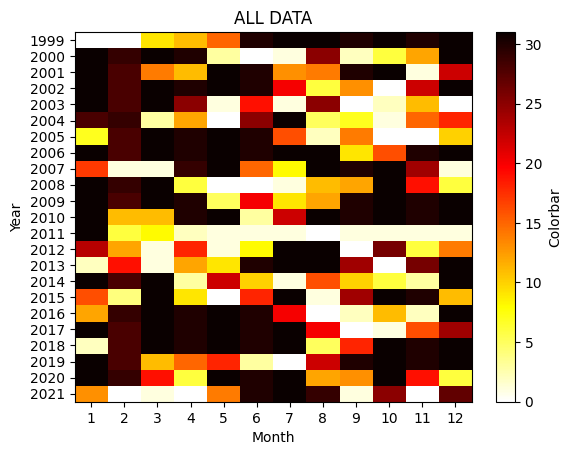

In [15]:
print("ALL DATA")
concat_EQ_NoEQ = np.concatenate((hasEQ, noEQ), axis = 0)
df = date_table(concat_EQ_NoEQ)
print(df)
plot_date_table(df, "ALL DATA") 

In [16]:
print("JUST EQ DATA")
df = date_table(hasEQ)
print(df)
# plot_date_table(df, "JUST EQ DATA") 

JUST EQ DATA
              1  2   3  4  5  6  7  8  9  10  11  12  total
1999          0  0   0  0  1  0  0  0  0   0   0   0      1
2000          0  0   0  0  0  0  1  0  0   1   0   0      2
2001          0  0   0  0  0  0  0  1  0   0   0   0      1
2002          0  0   0  0  0  0  0  0  0   0   0   0      0
2003          0  0   0  0  1  0  0  0  0   2   0   0      3
2004          0  0   0  0  0  0  0  0  0   1   1   0      2
2005          2  0   0  0  0  0  0  2  0   0   0   0      4
2006          0  0   0  0  0  0  0  0  0   0   0   0      0
2007          0  1   1  0  0  0  0  0  0   0   0   0      2
2008          0  0   0  0  0  0  0  0  0   0   0   0      0
2009          0  0   0  0  0  0  0  0  0   0   0   0      0
2010          0  0   1  0  0  0  0  0  0   0   0   0      1
2011          0  0   8  2  1  1  1  0  1   1   0   0     15
2012          0  0   1  0  1  0  0  0  0   1   0   0      3
2013          0  0   0  1  1  0  0  0  0   0   0   0      2
2014          0  0   0  0  

In [17]:
print("JUST NO EQ DATA")
df = date_table(noEQ)
print(df)
# plot_date_table(df, "JUST NO EQ DATA") 

JUST NO EQ DATA
                1    2    3    4    5    6    7    8    9   10   11   12  \
1999            0    0    9   11   14   30   31   31   30   31   30   31   
2000           31   29   31   30    3    0    0   25    2    5   12   31   
2001           31   28   14   11   31   30   13   13   30   31    1   22   
2002           31   28   31   30   31   30   20    6   13    0   22   31   
2003           31   28   31   25    0   19    1   25    0    0   11    0   
2004           28   29    3   12    0   25   31    5    7    0   14   18   
2005            5   28   31   30   31   30   16    0   14    0    0   10   
2006           31   28   31   30   31   30   31   31    9   16   30   31   
2007           17    0    0   29   31   15    8   31   30   31   24    1   
2008           31   29   31    6    0    0    1   11   12   31   19    6   
2009           31   28   31   30    5   20    9   12   30   31   30   31   
2010           31   11   10   30   31    3   22   31   30   31   30   31

In [18]:
print("JUST TRAIN DATA OF NOEQ")
df = date_table(trainNoEQ_date)
print(df)
# plot_date_table(df, "JUST TRAIN DATA OF NOEQ") 

JUST TRAIN DATA OF NOEQ
                1    2    3    4    5    6    7    8    9   10   11   12  \
1999            0    0    9   11   14   10   20   28    2   31   30   31   
2000           31   29    0   30    3    0    0   25    2    5   12   31   
2001           31   28   14   11   31   30   13   13   30   31    1   22   
2002           16   12   31   30   14   16   20    6   13    0   21   31   
2003            8   20   31   25    0   19    1   25    0    0   11    0   
2004           28   29    3   12    0   25   31    5    7    0   14   18   
2005            5   28   31   15    4   10   16    0   14    0    0   10   
2006           31   28   31   30   31   30   31   31    9   16   30   31   
2007           17    0    0   22   31   15    8   14   16   31   24    1   
2008           31   29   31    6    0    0    1   11   12   31   19    6   
2009           11   17   31   30    5   20    9   12   30   31   30   31   
2010           31   11   10   30   31    3   22   14   16   31  

In [19]:
print("JUST TEST DATA OF NOEQ")
df = date_table(testNoEQ_date)
print(df)
# plot_date_table(df, "JUST TEST DATA OF NOEQ") 

JUST TEST DATA OF NOEQ
              1  2  3  4  5  6  7  8  9  10  11  12  total
1999          0  0  0  0  0  0  1  0  1   0   0   0      2
2000          0  0  1  0  0  0  0  0  0   0   0   0      1
2001          0  0  0  0  0  0  0  0  0   0   0   0      0
2002          0  1  0  0  0  1  0  0  0   0   1   0      3
2003          0  1  0  0  0  0  0  0  0   0   0   0      1
2004          0  0  0  0  0  0  0  0  0   0   0   0      0
2005          0  0  0  0  1  1  0  0  0   0   0   0      2
2006          0  0  0  0  0  0  0  0  0   0   0   0      0
2007          0  0  0  1  0  0  0  0  1   0   0   0      2
2008          0  0  0  0  0  0  0  0  0   0   0   0      0
2009          0  1  0  0  0  0  0  0  0   0   0   0      1
2010          0  0  0  0  0  0  0  0  1   0   0   1      2
2011          0  0  0  0  0  0  0  0  0   0   0   0      0
2012          0  0  0  0  0  0  0  1  0   0   0   0      1
2013          0  0  0  0  0  0  0  0  0   0   0   1      1
2014          0  0  0  0  0  0  0

In [20]:
print("JUST TEST DATA OF EQ")
df = date_table(testEQ_date)
print(df)
# plot_date_table(df, "JUST TEST DATA OF EQ") 

JUST TEST DATA OF EQ
              1  2  3  4  5  6  7  8  9  10  11  12  total
1999          0  0  0  0  0  0  0  0  0   0   0   0      0
2000          0  0  0  0  0  0  1  0  0   0   0   0      1
2001          0  0  0  0  0  0  0  0  0   0   0   0      0
2002          0  0  0  0  0  0  0  0  0   0   0   0      0
2003          0  0  0  0  0  0  0  0  0   1   0   0      1
2004          0  0  0  0  0  0  0  0  0   1   0   0      1
2005          1  0  0  0  0  0  0  1  0   0   0   0      2
2006          0  0  0  0  0  0  0  0  0   0   0   0      0
2007          0  1  0  0  0  0  0  0  0   0   0   0      1
2008          0  0  0  0  0  0  0  0  0   0   0   0      0
2009          0  0  0  0  0  0  0  0  0   0   0   0      0
2010          0  0  0  0  0  0  0  0  0   0   0   0      0
2011          0  0  3  0  1  1  0  0  1   0   0   0      6
2012          0  0  0  0  1  0  0  0  0   1   0   0      2
2013          0  0  0  1  1  0  0  0  0   0   0   0      2
2014          0  0  0  0  0  0  1  

In [21]:
testEQ_date[0,0,0,6:9]

array([2021.,    5.,   13.])

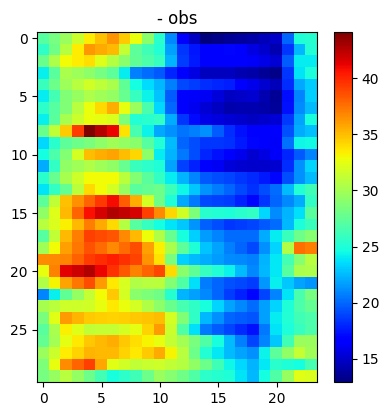

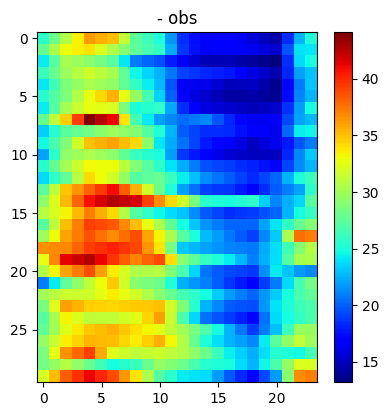

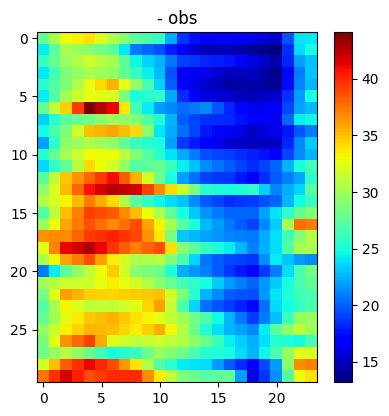

In [22]:
show_obs_pic(hasEQ[:,34:64], 10)
show_obs_pic(hasEQ[:,35:65], 10)
show_obs_pic(hasEQ[:,36:66], 10)
# show_pic()

In [23]:
testEQ_x, testEQ_y = generate_testing_data(testEQ, 7)
testNoEQ_x, testNoEQ_y = generate_testing_data(testNoEQ, 7) 
print(testEQ_x.shape)
print(testEQ_y.shape)
print(testNoEQ_x.shape)
print(testNoEQ_y.shape)

print(testEQ_x.max())
print(testEQ_x.min())
print(testNoEQ_x.max())
print(testNoEQ_x.min())
print(testEQ_y.max())
print(testEQ_y.min())
print(testNoEQ_y.max())
print(testNoEQ_y.min())

(20, 30, 7, 30, 24, 1)
(20, 30, 30, 24, 1)
(20, 30, 7, 30, 24, 1)
(20, 30, 30, 24, 1)
0.5183290707587382
0.011082693947144076
0.751918158567775
0.0
0.495311167945439
0.011082693947144076
0.7331628303495311
0.0


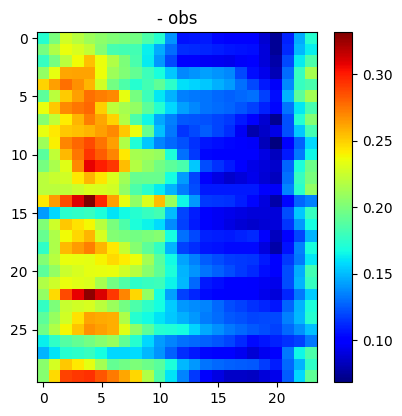

In [24]:
show_obs_pic(testEQ_x[:,29,0], 10)

In [25]:
print(X.max())
print(X.min())
print(Y.max())
print(Y.min())

1.0
0.0
1.0
0.0


In [26]:
model = load_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 7, 30, 24, 128)    594944    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 7, 30, 24, 128)    0         
                                                                 
 batch_normalization (BatchN  (None, 7, 30, 24, 128)   512       
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 7, 30, 24, 64)     442624    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 30, 24, 64)     0         
                                                                 
 batch_normalization_1 (Batc  (None, 7, 30, 24, 64)    256       
 hNormalization)                                        

In [140]:
model_GIMTEC = model.fit(X, Y, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
3434/3434 [==============================] - 713s 205ms/step - loss: 0.0245 - accuracy: 4.3864e-06 - val_loss: 0.0110 - val_accuracy: 3.1855e-06
Epoch 2/30
3434/3434 [==============================] - 707s 206ms/step - loss: 0.0132 - accuracy: 4.4370e-06 - val_loss: 0.0198 - val_accuracy: 3.1855e-06
Epoch 3/30
3434/3434 [==============================] - 709s 206ms/step - loss: 0.0095 - accuracy: 4.4370e-06 - val_loss: 0.0075 - val_accuracy: 3.1855e-06
Epoch 4/30
3434/3434 [==============================] - 707s 206ms/step - loss: 0.0076 - accuracy: 4.4370e-06 - val_loss: 0.0167 - val_accuracy: 3.1855e-06
Epoch 5/30
3434/3434 [==============================] - 703s 205ms/step - loss: 0.0070 - accuracy: 4.4370e-06 - val_loss: 0.0044 - val_accuracy: 3.1855e-06
Epoch 6/30
3434/3434 [==============================] - 706s 206ms/step - loss: 0.0065 - accuracy: 4.4370e-06 - val_loss: 0.0056 - val_accuracy: 3.1855e-06
Epoch 7/30
3434/3434 [==============================] - 707s 206

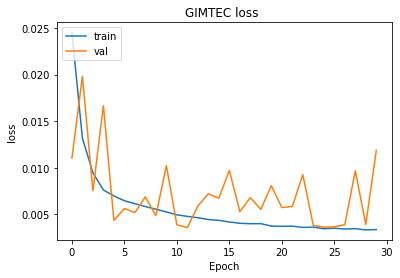

In [141]:
train_history(model_GIMTEC,'loss','val_loss','GIMTEC loss ','loss')

In [142]:
model.save('./model/model.h5')

In [25]:
# model = tf.keras.models.load_model('./model/model.h5')
model = tf.keras.models.load_model('./model/rs13_72_th30_72_57.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error})
# model = tf.keras.models.load_model('./model/rs6_87_th30_70_67.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error})

In [26]:
print(testEQ_x.shape)
print(testEQ_y.shape)
# print(testNoEQ_x.shape)
# print(testNoEQ_y.shape)
# (30, 30, 7, 30, 24, 1)
# (30, 30, 30, 24, 1)

(20, 30, 7, 30, 24, 1)
(20, 30, 30, 24, 1)


In [27]:
pred_x = testEQ_x[0,29]
pred_x = pred_x[np.newaxis,:,:,:,:]
model.predict(pred_x).shape
# pred_x.shape

2023-05-20 18:06:13.747641: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 592ms/step


(1, 30, 24, 1)

In [28]:
eval_EQ_x = testEQ_x.reshape((600, 7, 30, 24, 1))
eval_EQ_y = testEQ_y.reshape((600, 30, 24, 1))
loss, acc = model.evaluate(eval_EQ_x, eval_EQ_y)

19/19 [==============================] - 30s 2s/step - loss: 0.0140 - accuracy: 0.0000e+00


In [29]:
eval_NoEQ_x = testNoEQ_x.reshape((600, 7, 30, 24, 1))
eval_NoEQ_y = testNoEQ_y.reshape((600, 30, 24, 1))
loss, acc = model.evaluate(eval_NoEQ_x, eval_NoEQ_y)

19/19 [==============================] - 33s 2s/step - loss: 0.0136 - accuracy: 1.1574e-05


In [30]:
def calculate_error(data, label):
    square_error_list = []
    for i in range(len(data)):
        square_error = 0
        for j in range(30):
            x = data[i,j]
            x = x[np.newaxis,:,:,:,:] # (1, 7, 30, 24, 1)
            pred_x = model.predict(x, verbose=0) # (1, 30, 24, 1)
            pred_x = np.squeeze(pred_x) # (30, 24)
            label_x =  label[i,j]     
            label_x = np.squeeze(label_x) # (30, 24)
            s_e = ((pred_x[29] - label_x[29])**2).sum(axis=0) # Only count the last day MseError.
            square_error += s_e
        mean_square_error = square_error / (30*24)
        square_error_list.append(mean_square_error)
    return square_error_list

def calculate_relative_mae_error(data, label):
    re_list = []
    for i in range(len(data)):
        stageOne = 0
        stageTwo = 0
        for j in range(30):
            x = data[i,j]
            x = x[np.newaxis,:,:,:,:] # (1, 7, 30, 24, 1)
            pred_x = model.predict(x, verbose=0) # (1, 30, 24, 1)
            pred_x = np.squeeze(pred_x) # (30, 24)
            label_x =  label[i,j]     
            label_x = np.squeeze(label_x) # (30, 24)
            s_e = (np.absolute(pred_x[29] - label_x[29])).sum(axis=0) # Only count the last day MseError.
            if j < 15:
                stageOne += s_e
            else:
                stageTwo += s_e
        mae_stageOne = stageOne / 15*24
        mae_stageTwo = stageTwo / 15*24
        re_mae = np.absolute((mae_stageTwo - mae_stageOne) / mae_stageOne)
        re_list.append(re_mae)
    return re_list

def calculate_relative_rmse_error(data, label):
    re_list = []
    for i in range(len(data)):
        stageOne = 0
        stageTwo = 0
        for j in range(30):
            x = data[i,j]
            x = x[np.newaxis,:,:,:,:] # (1, 7, 30, 24, 1)
            pred_x = model.predict(x, verbose=0) # (1, 30, 24, 1)
            pred_x = np.squeeze(pred_x) # (30, 24)
            label_x =  label[i,j]     
            label_x = np.squeeze(label_x) # (30, 24)
            s_e = ((pred_x[29] - label_x[29])**2).sum(axis=0) # Only count the last day MseError.
            if j < 15:
                stageOne += s_e
            else:
                stageTwo += s_e
        rmse_stageOne = np.sqrt(stageOne / 15*24)
        rmse_stageTwo = np.sqrt(stageTwo / 15*24)
        re_rmse = np.absolute((rmse_stageTwo - rmse_stageOne) / rmse_stageOne)
        re_list.append(re_rmse)
    return re_list

# def calculate_error(data, label):
#     square_error_list = []
#     for i in range(len(data)):
#         square_error = 0
#         for j in range(30):
#             x = data[i,j]
#             x = x[np.newaxis,:,:,:,:] # (1, 7, 30, 24, 1)
#             pred_x = model.predict(x, verbose=0) # (1, 30, 24, 1)
#             pred_x = np.squeeze(pred_x) # (30, 24)
#             label_x =  label[i,j]     
#             label_x = np.squeeze(label_x) # (30, 24)
#             s_e = ((pred_x[29] - label_x[29])**2).sum(axis=0)
#             square_error += s_e
#         mean_square_error = square_error / (30*24)
#         square_error_list.append(mean_square_error)
#     return square_error_list

In [31]:
EQ_MAE_list = calculate_relative_mae_error(testEQ_x, testEQ_y)
mean_EQ_MAE_list = sum(EQ_MAE_list)/len(EQ_MAE_list)
print(EQ_MAE_list)
print(mean_EQ_MAE_list)

EQ_RMSE_list = calculate_relative_rmse_error(testEQ_x, testEQ_y)
mean_EQ_RMSE_list = sum(EQ_RMSE_list)/len(EQ_RMSE_list)
print(EQ_RMSE_list)
print(mean_EQ_RMSE_list)

[0.0902855427173223, 0.1798018487183285, 0.42304305005965803, 0.33323683583349495, 0.15088320392555268, 0.3666958826590734, 0.3340648898035849, 0.015330564473333707, 0.04396268362183436, 0.02921166082837569, 0.3304027857819465, 0.7479621104371947, 0.7866775354597795, 0.28711002776139216, 0.02831503795507986, 0.3928346577225688, 0.16351533536824947, 0.028385991785763558, 0.03769774175592464, 0.5329162923917393]
0.26511668395300986
[0.13929167861837144, 0.21441543439071814, 0.508810508521294, 0.27001006818093537, 0.20440846745366614, 0.4059960523142361, 0.4738699475904401, 0.013080411227579726, 0.1161012148250181, 0.039707898275112924, 0.20357932294644215, 0.659766504831896, 0.6879695430350848, 0.3437212011998722, 0.07243733391730943, 0.3762410382996519, 0.20548524703363794, 0.0015575764401484337, 0.06427434179015393, 0.4954647918419627]
0.27480942913667655


In [32]:
NoEQ_MAE_list = calculate_relative_mae_error(testNoEQ_x, testNoEQ_y)
mean_NoEQ_MAE_list = sum(NoEQ_MAE_list)/len(NoEQ_MAE_list)
print(NoEQ_MAE_list)
print(mean_NoEQ_MAE_list)

NoEQ_RMSE_list = calculate_relative_rmse_error(testNoEQ_x, testNoEQ_y)
mean_NoEQ_RMSE_list = sum(NoEQ_RMSE_list)/len(NoEQ_RMSE_list)
print(NoEQ_MAE_list)
print(mean_NoEQ_RMSE_list)

[0.2378864558692845, 0.2185693169231626, 0.2942061075876422, 0.2934791967103082, 0.25911797003124704, 0.14534360534966836, 0.2167288529162852, 0.03805588859713138, 0.23280989214150483, 0.012909751348360164, 0.23142810605412348, 0.2457383121959513, 0.1710227015406504, 0.11886468867721149, 0.022049143234554338, 0.25270583159496635, 0.2857942382419677, 0.13431155131531144, 0.08526788287041112, 0.12051567821323887]
0.18084025857064906
[0.2378864558692845, 0.2185693169231626, 0.2942061075876422, 0.2934791967103082, 0.25911797003124704, 0.14534360534966836, 0.2167288529162852, 0.03805588859713138, 0.23280989214150483, 0.012909751348360164, 0.23142810605412348, 0.2457383121959513, 0.1710227015406504, 0.11886468867721149, 0.022049143234554338, 0.25270583159496635, 0.2857942382419677, 0.13431155131531144, 0.08526788287041112, 0.12051567821323887]
0.23214366059471286


In [33]:
# (30, 30, 24, 1)
def predict_pic(data, label):
    result = np.zeros((data.shape[0],30,24,1))
    for i in range(len(data)):
        for j in range(30):
            x = data[i,j]
            x = x[np.newaxis,:,:,:,:] # (1, 7, 30, 24, 1)
            pred_x = model.predict(x, verbose=0) # (1, 30, 24, 1)
            pred_x = np.squeeze(pred_x, axis=0) # (30, 24, 1)
            result[i,j] = pred_x[29]
    return result

In [34]:
result_EQ_pic = predict_pic(testEQ_x, testEQ_y)
print(result_EQ_pic.shape)
result_NoEQ_pic = predict_pic(testNoEQ_x, testNoEQ_y)
print(result_NoEQ_pic.shape)

(20, 30, 24, 1)
(20, 30, 24, 1)


In [35]:
# testEQ_diff_pic = np.abs(result_EQ_pic - testEQ_y[:,29])
# testNoEQ_diff_pic = np.abs(result_NoEQ_pic - testNoEQ_y[:,29])

In [36]:
# (預測-真實) / 真實
# testEQ_reladiff_pic = (result_EQ_pic - testEQ_y[:,29]) / testEQ_y[:,29]
# testNoEQ_reladiff_pic = (result_NoEQ_pic - testNoEQ_y[:,29]) / testNoEQ_y[:,29]

In [ ]:
# show_obs_pic(result_EQ_pic, 3, str="Predict")
# show_obs_pic(testEQ_y[:,29], 3, str="Label")

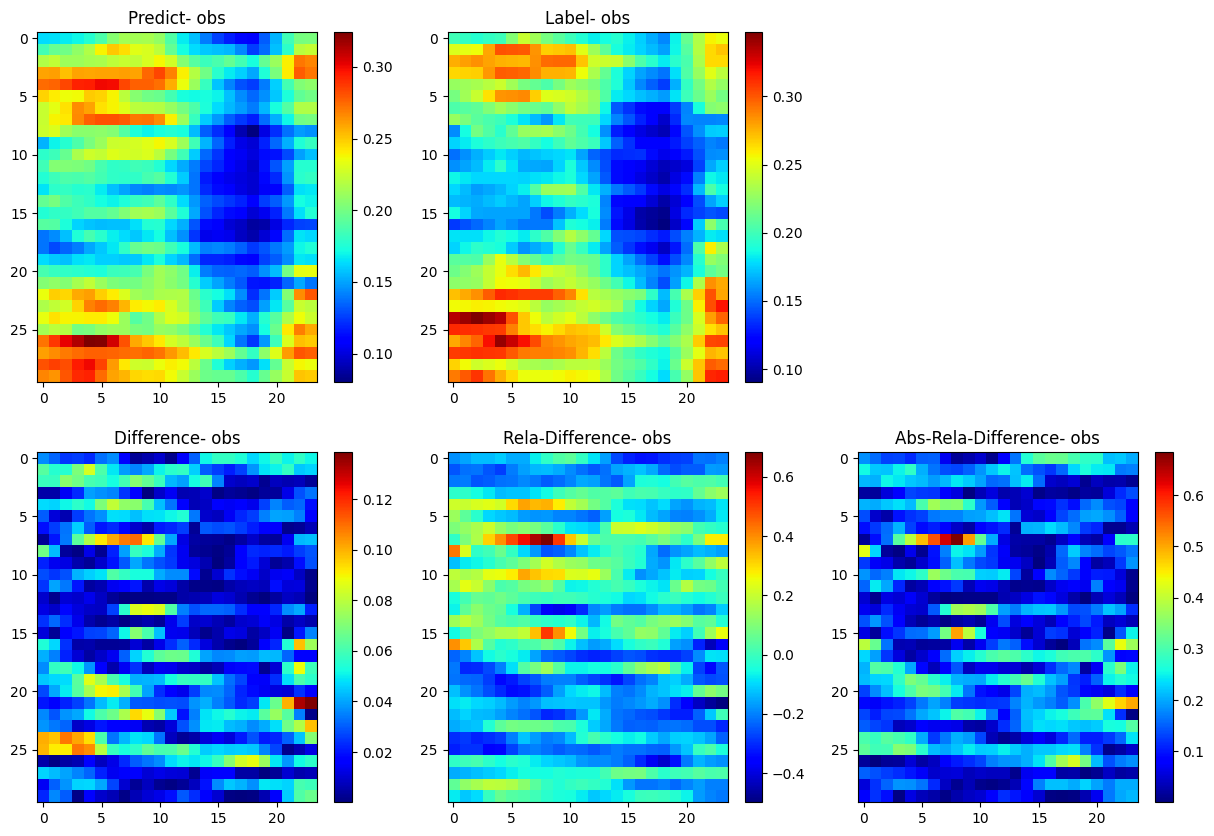

In [ ]:
show_all(result_EQ_pic, testEQ_y[:,29], 3)

In [ ]:
# reverse_result_EQ_pic = reverse_minmax(result_EQ_pic, train_min, train_max)
# reverse_testEQ_y = reverse_minmax(testEQ_y, train_min, train_max)

# show_obs_pic(reverse_result_EQ_pic, 8, str="Predict")
# show_obs_pic(reverse_testEQ_y[:,29], 8, str="Label")
# show_diff_pic()

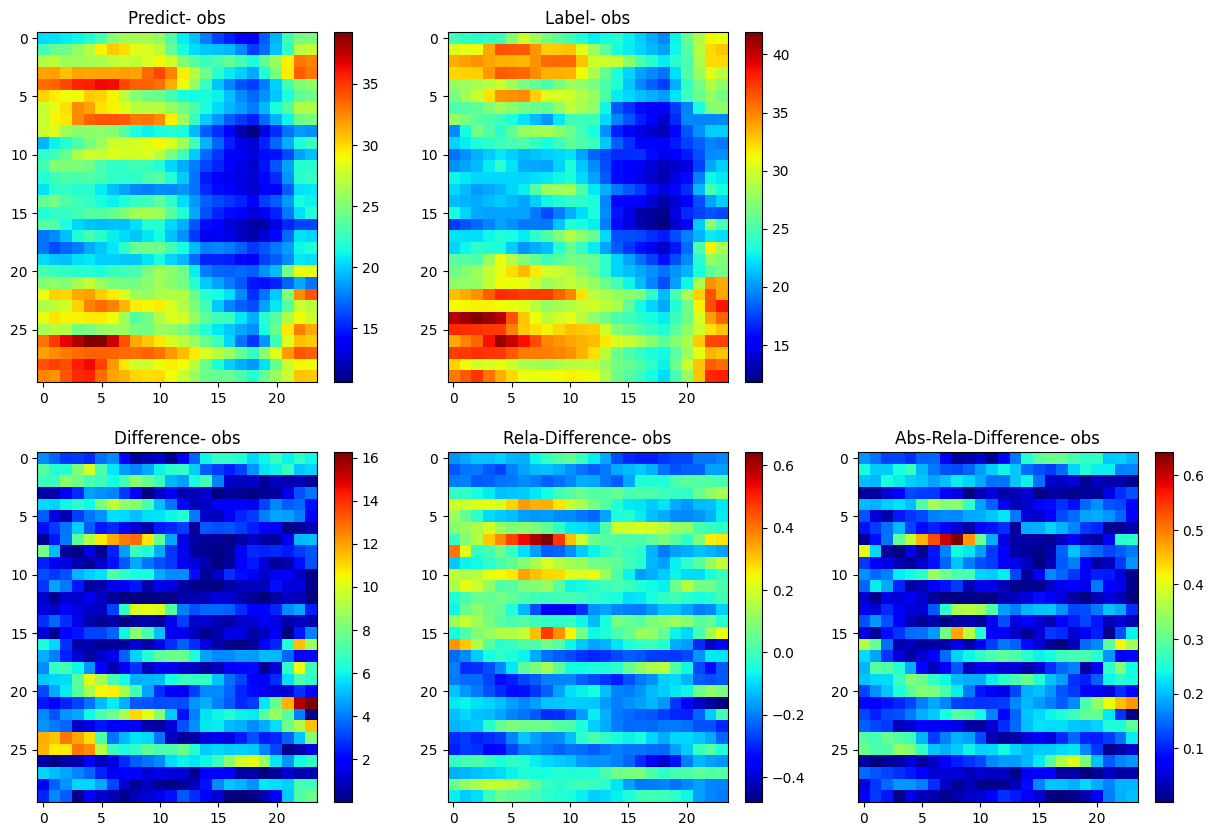

In [ ]:
reverse_result_EQ_pic = reverse_minmax(result_EQ_pic, train_min, train_max)
reverse_testEQ_y = reverse_minmax(testEQ_y, train_min, train_max)
show_all(reverse_result_EQ_pic, reverse_testEQ_y[:,29], 3)

In [ ]:
# show_obs_pic(result_NoEQ_pic, 1, str="Predict")
# show_obs_pic(testNoEQ_y[:,29], 1, str="Label")

/var/folders/jc/57mvsqsx4m3f9vd_yhxngwtm0000gn/T/ipykernel_18147/3513407939.py:23: RuntimeWarning: divide by zero encountered in divide
  reladiff = (pred - label) / label
/var/folders/jc/57mvsqsx4m3f9vd_yhxngwtm0000gn/T/ipykernel_18147/3513407939.py:30: RuntimeWarning: divide by zero encountered in divide
  absreladiff = np.abs(pred - label) / label


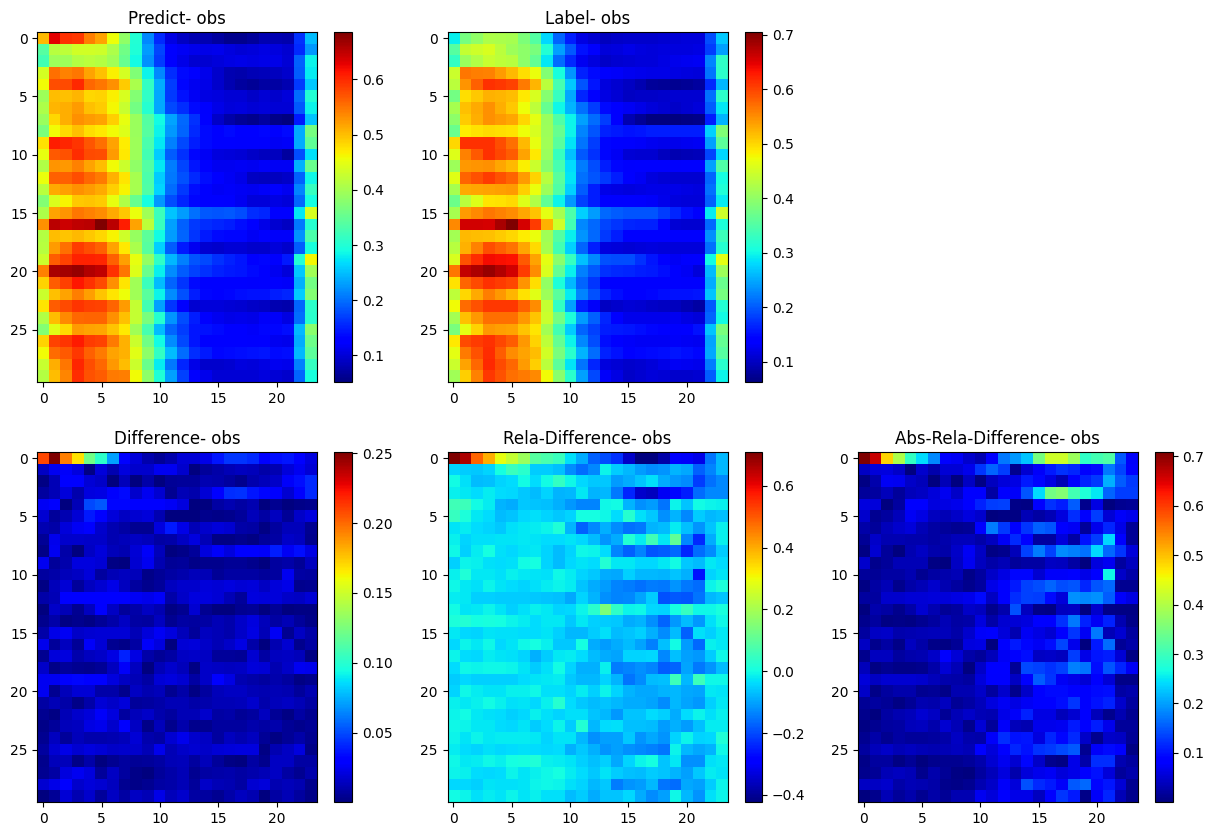

In [ ]:
show_all(result_NoEQ_pic, testNoEQ_y[:,29], 3)

In [ ]:
# reverse_result_NoEQ_pic = reverse_minmax(result_NoEQ_pic, train_min, train_max)
# reverse_testNoEQ_y = reverse_minmax(testNoEQ_y, train_min, train_max)

# show_obs_pic(reverse_result_NoEQ_pic, 19, str="Predict")
# show_obs_pic(reverse_testNoEQ_y[:,29], 19, str="Label")

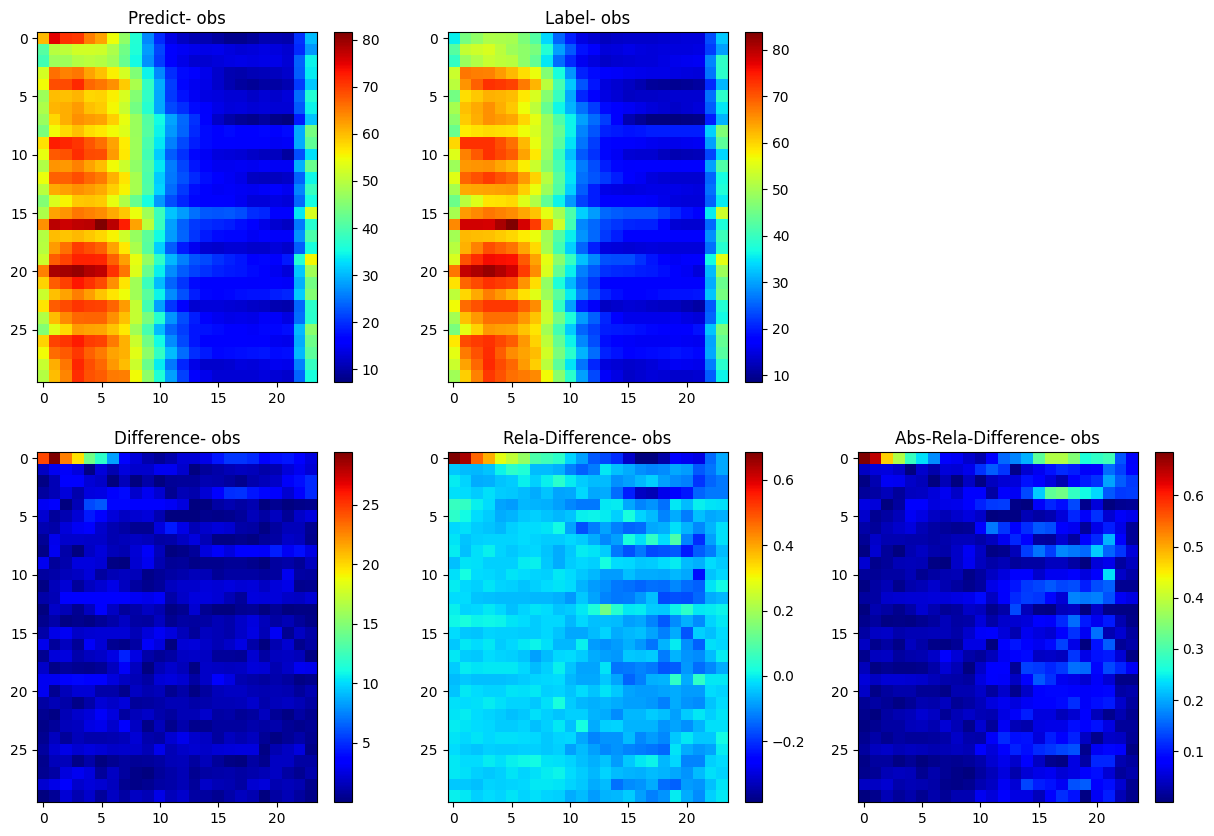

In [ ]:
reverse_result_NoEQ_pic = reverse_minmax(result_NoEQ_pic, train_min, train_max)
reverse_testNoEQ_y = reverse_minmax(testNoEQ_y, train_min, train_max)
show_all(reverse_result_NoEQ_pic, reverse_testNoEQ_y[:,29], 3)

In [ ]:
EQ_MSE_list = calculate_error(testEQ_x, testEQ_y)
mean_EQ_MSE = sum(EQ_MSE_list)/len(EQ_MSE_list)
print(mean_EQ_MSE)
# 6.824037521085579e-05

0.0006334504058961154


In [ ]:
# EQ_MSE_list

In [ ]:
NoEQ_MSE_list = calculate_error(testNoEQ_x, testNoEQ_y)
mean_NoEQ_MSE = sum(NoEQ_MSE_list)/len(NoEQ_MSE_list)
print(mean_NoEQ_MSE)
# 3.642997774508832e-05

0.00024269770686675558


In [ ]:
# NoEQ_MSE_list

In [ ]:
mean_EQ_MSE > mean_NoEQ_MSE

True

In [ ]:
print(EQ_MSE_list)
print(NoEQ_MSE_list)
print(max(NoEQ_MSE_list))
count = 0
for i in range(20):
    if EQ_MSE_list[i] > 0.0016336937589516616:
        count+=1
print(count)

[0.0003843870792156686, 0.0001872360920364876, 0.00041537678579186036, 0.001562123680781546, 0.00037495890159545254, 0.00032675065944017, 0.0004827731827919002, 0.001598142805677235, 0.0005657596170258251, 0.0006721194810876406, 0.0011086985582268226, 0.0006437735061509725, 0.0006385827022281558, 0.0005447008336733368, 0.0002083657730541905, 0.0004064836729538316, 0.000190539971068965, 0.00034249217497412375, 0.0006687290400179487, 0.0013470136001301712]
[0.0002800324120070173, 0.00034478717470294855, 0.00047650002474649065, 0.0005467894072757695, 0.00037381967170419683, 0.0002821361940878325, 0.0001953320219049396, 0.0003292337660403235, 0.00025526685988476694, 0.00018136452838017533, 0.00013969329859598808, 6.892375473383975e-05, 0.0002077491273096557, 0.0001570919639773525, 0.00020955577884400271, 0.00016932791613064312, 0.00013704596786899114, 0.000186955427950183, 0.0001685848141962884, 0.0001437640269937057]
0.0005467894072757695
0


In [ ]:
def add_date(date):
    my_dict = {}
    for i in range(date.shape[0]):
        my_dict[i] = str(int(date[i,0,0,6])) + '-'  + str(int(date[i,0,0,7])) + '-' + str(int(date[i,0,0,8]))
    return my_dict

def add_mag(date):
    my_dict = {}
    for i in range(date.shape[0]):
        my_dict[i] = date[i,0,0,9]
    return my_dict

def error_list(data):
    my_dict = {}
    for i in range(len(data)):
        my_dict[data[i]] = i
    return my_dict

def sort_error_date_list(errorDict, dateDict, str, magDict=None):
    sorted_keys = sorted(errorDict.keys(), reverse=True)
    print(str+"---\n"+"I have multiplied each error value by 10^5 for easier comparison.\n")
    if(str == "EQ"):
        for i in range(len(errorDict)):
            print("Rank: ",i+1, "   Index: ", errorDict[sorted_keys[i]], "    Error: ", sorted_keys[i] * 10**5, "    Date: ", dateDict[errorDict[sorted_keys[i]]], "\n", "    Magnitude: ", magDict[errorDict[sorted_keys[i]]])
    else:
        for i in range(len(errorDict)):
            print("Rank: ",i+1, "   Index: ", errorDict[sorted_keys[i]], "    Error: ", sorted_keys[i] * 10**5, "    Date: ", dateDict[errorDict[sorted_keys[i]]], "\n")


In [ ]:
test_EQ_date = add_date(testEQ_date)
test_EQ_mag = add_mag(testEQ_date)
error_EQ = error_list(EQ_MSE_list)
sort_error_date_list(error_EQ, test_EQ_date, "EQ", test_EQ_mag)

EQ---
I have multiplied each error value by 10^5 for easier comparison.

Rank:  1    Index:  7     Error:  159.8142805677235     Date:  2012-5-20 
     Magnitude:  6.3
Rank:  2    Index:  3     Error:  156.2123680781546     Date:  2014-7-11 
     Magnitude:  6.5
Rank:  3    Index:  19     Error:  134.70136001301714     Date:  2000-7-20 
     Magnitude:  6.0
Rank:  4    Index:  10     Error:  110.86985582268225     Date:  2011-5-5 
     Magnitude:  6.0
Rank:  5    Index:  9     Error:  67.21194810876406     Date:  2011-6-3 
     Magnitude:  6.1
Rank:  6    Index:  18     Error:  66.87290400179486     Date:  2003-10-8 
     Magnitude:  6.7
Rank:  7    Index:  11     Error:  64.37735061509726     Date:  2011-3-14 
     Magnitude:  6.0
Rank:  8    Index:  12     Error:  63.85827022281558     Date:  2011-3-13 
     Magnitude:  6.1
Rank:  9    Index:  8     Error:  56.575961702582504     Date:  2011-9-15 
     Magnitude:  6.1
Rank:  10    Index:  13     Error:  54.47008336733368     Date:  2

In [ ]:
test_NoEQ_date = add_date(testNoEQ_date)
error_NoEQ = error_list(NoEQ_MSE_list)
sort_error_date_list(error_NoEQ, test_NoEQ_date, "NoEQ")

NoEQ---
I have multiplied each error value by 10^5 for easier comparison.

Rank:  1    Index:  3     Error:  54.67894072757695     Date:  2002-2-16 

Rank:  2    Index:  2     Error:  47.650002474649064     Date:  2000-3-31 

Rank:  3    Index:  4     Error:  37.381967170419685     Date:  2002-6-14 

Rank:  4    Index:  1     Error:  34.47871747029485     Date:  1999-9-28 

Rank:  5    Index:  7     Error:  32.923376604032356     Date:  2005-5-16 

Rank:  6    Index:  5     Error:  28.21361940878325     Date:  2002-11-9 

Rank:  7    Index:  0     Error:  28.00324120070173     Date:  1999-7-11 

Rank:  8    Index:  8     Error:  25.526685988476693     Date:  2005-6-20 

Rank:  9    Index:  14     Error:  20.95557788440027     Date:  2012-8-18 

Rank:  10    Index:  12     Error:  20.77491273096557     Date:  2010-9-14 

Rank:  11    Index:  6     Error:  19.53320219049396     Date:  2003-2-8 

Rank:  12    Index:  17     Error:  18.6955427950183     Date:  2017-6-19 

Rank:  13    Inde

In [ ]:

sorted_keys = sorted(error_NoEQ.keys(), reverse=True)
print(sorted_keys)

[0.0005467894072757695, 0.00047650002474649065, 0.00037381967170419683, 0.00034478717470294855, 0.0003292337660403235, 0.0002821361940878325, 0.0002800324120070173, 0.00025526685988476694, 0.00020955577884400271, 0.0002077491273096557, 0.0001953320219049396, 0.000186955427950183, 0.00018136452838017533, 0.00016932791613064312, 0.0001685848141962884, 0.0001570919639773525, 0.0001437640269937057, 0.00013969329859598808, 0.00013704596786899114, 6.892375473383975e-05]


In [ ]:
def threshold_list(seq, threshold):
    return [1 if x > threshold else 0 for x in seq]

def confusion_matrix_table(y_true, y_pred, labels):
    cm = np.zeros((len(labels), len(labels)), dtype=int)
    for i in range(len(labels)):
        for j in range(len(labels)):
            list1 = [True if x == labels[i] else False for x in y_pred]
            list2 = [True if x == labels[j] else False for x in y_true]
            res =  [x1 & x2 for x1, x2 in zip(list1, list2)]
            cm[i, j] = np.sum(res)
    cm_table = pd.DataFrame(cm, index=["NoEQ", "EQ"], columns=["NoEQ", "EQ"])
    return cm_table

threshold = max(NoEQ_MSE_list)
# threshold =0.0002554153861212242
n = 20
list_0 = threshold_list(NoEQ_MSE_list, threshold)
list_1 = threshold_list(EQ_MSE_list, threshold)
y_pred = list_0 + list_1
y_true = [0]*n + [1]*n
labels = [0, 1]
confusion_table = confusion_matrix_table(y_true, y_pred, labels)

print(y_pred)
print(y_true)
print(confusion_table)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
      NoEQ  EQ
NoEQ    20  11
EQ       0   9


In [ ]:
threshold = 0.30
n = 20
list_0 = threshold_list(NoEQ_MAE_list, threshold)
list_1 = threshold_list(EQ_MAE_list, threshold)
y_pred = list_0 + list_1
y_true = [0]*n + [1]*n
labels = [0, 1]
confusion_table = confusion_matrix_table(y_true, y_pred, labels)

print(y_pred)
print(y_true)
print("\nRelative Error using MAE.")
print(confusion_table)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Relative Error using MAE.
      NoEQ  EQ
NoEQ    20  11
EQ       0   9


In [ ]:
threshold = 0.30
n = 20
list_0 = threshold_list(NoEQ_RMSE_list, threshold)
list_1 = threshold_list(EQ_RMSE_list, threshold)
y_pred = list_0 + list_1
y_true = [0]*n + [1]*n
labels = [0, 1]
confusion_table = confusion_matrix_table(y_true, y_pred, labels)

print(y_pred)
print(y_true)
print("\nRelative Error using RMSE.")
print(confusion_table)

[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Relative Error using RMSE.
      NoEQ  EQ
NoEQ    15  12
EQ       5   8


In [ ]:
# Each case = (30, 24, 1)
def calculate_each_test_case(data, k):
    data = np.squeeze(data) # (num_data, 30, 24, 1) -> (num_data, 30, 24)
    # 11~25, 12~26, 13~27, 14~28, 15~29
    data = data[:, 11:30, :] # data.shape = (num_data, 19, 24)
    pred = np.zeros((data.shape[0], 5, 24, 15)) # Ref_days = 15
    res = np.zeros((data.shape[0], 5, 24))
    for i in range(data.shape[0]):
        for j in range(15):
            pred[i, :, :, j] = data[i, j:j+5, :] # 0~4, 1~5, 2~6, ..., 15~19
    for i in range(data.shape[0]):
        [q1, q2, q3] = np.percentile(pred[i], [25, 50, 75], axis=2)
        obs = data[i,14:19] # (5, 24)
        ub = q2 + k*(q3-q2) # (5, 24)
        # lb = q2 - k*(q2-q1) # (5, 24)
        pos = obs - ub
        pos[pos < 0] = 0
        pos[pos > 0] = 1
        res[i] = pos
    return res
def filter_test_case(data, threshold):
    count = 0
    for i in range(data.shape[0]):
        if(np.sum(data[i]/120) > threshold):
            count += 1
            print(i)
    # print(count)
    return count / data.shape[0]
    
        
        
    
test_EQ_res = calculate_each_test_case(reverse_result_EQ_pic, k=1.5)
print(test_EQ_res.shape)
EQ_rate = filter_test_case(test_EQ_res, threshold=1/3)
print(EQ_rate)

test_NoEQ_res = calculate_each_test_case(reverse_result_NoEQ_pic, k=1.5)
print(test_NoEQ_res.shape)
NoEQ_rate = filter_test_case(test_NoEQ_res, threshold=1/3)
print(NoEQ_rate)

(30, 5, 24)
1
3
4
6
7
11
12
13
14
16
17
18
0.4
(30, 5, 24)
2
7
11
0.1


In [ ]:
# EQ_last_five = sum(EQ_MSE_list[25:30])/5
# NoEQ_last_five = sum(NoEQ_MSE_list[25:30])/5
# print(EQ_last_five)
# print(NoEQ_last_five)